2.Temperal Dynamics

2.1 Peak Usage Time

In [3]:
import pandas as pd

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'])
    # Combine 'STATION' and 'NAME' into a single 'STATION_NAME' column for analysis
    data['STATION_NAME'] = data['STATION ID'].astype(str) + ' ' + data['NAME']
    return data

# Function to analyze peak usage times
def analyze_peak_usage(data):
    # Group by time to find the average available bikes for each time of the day
    peak_usage = data.groupby(data['TIME'])['AVAILABLE BIKES'].mean()
    # Identify peak usage times
    peak_times = peak_usage.idxmin()  # time when bikes are most in use (least available)
    low_times = peak_usage.idxmax()  # time when bikes are least in use (most available)
    return peak_times, low_times, peak_usage

# Load the datasets
before_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')
during_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv')
after_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')

# Analyze peak usage times for each period
peak_times_before, low_times_before, peak_usage_before = analyze_peak_usage(before_pandemic_data)
peak_times_during, low_times_during, peak_usage_during = analyze_peak_usage(during_pandemic_data)
peak_times_after, low_times_after, peak_usage_after = analyze_peak_usage(after_pandemic_data)

# Print out the peak and low usage times
print(f"Peak usage times before the pandemic: {peak_times_before}")
print(f"Low usage times before the pandemic: {low_times_before}")
print(f"Peak usage times during the pandemic: {peak_times_during}")
print(f"Low usage times during the pandemic: {low_times_during}")
print(f"Peak usage times after the pandemic: {peak_times_after}")
print(f"Low usage times after the pandemic: {low_times_after}")

Peak usage times before the pandemic: 07:30:05
Low usage times before the pandemic: 01:20:27
Peak usage times during the pandemic: 18:45:27
Low usage times during the pandemic: 04:00:05
Peak usage times after the pandemic: 09:00:05
Low usage times after the pandemic: 05:00:02


2.2 Time Series Analysis

base on AVAILABLE BIKES

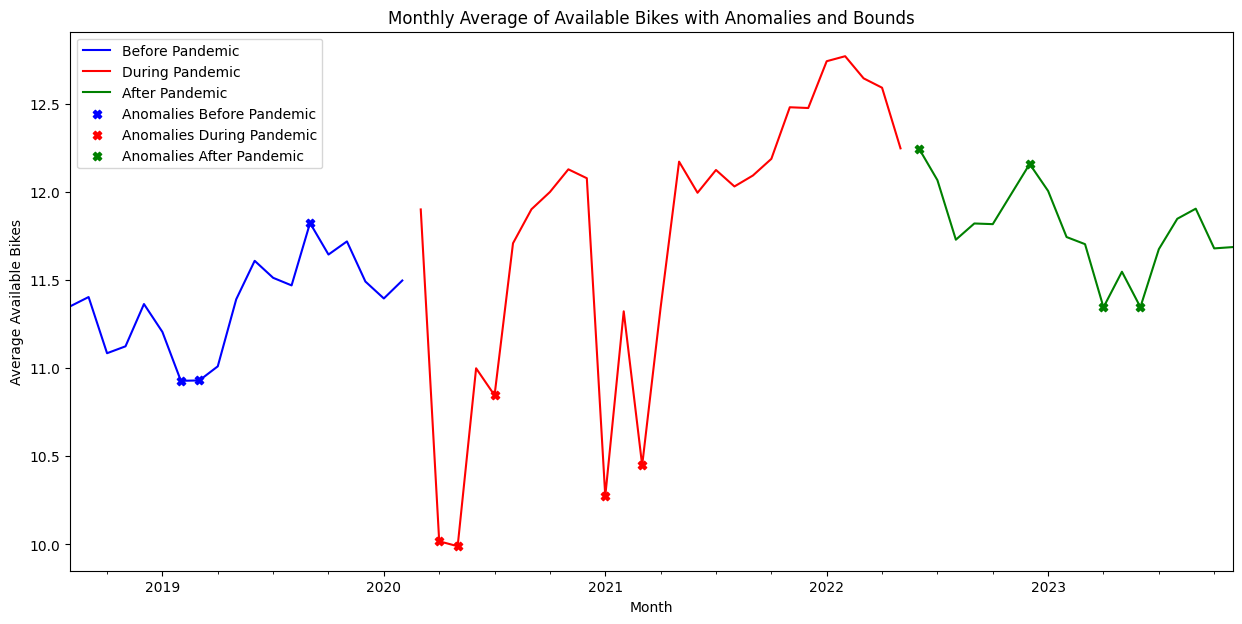

Anomalies before the pandemic:
DATE
2019-02-28    10.928324
2019-03-31    10.930537
2019-09-30    11.823486
Name: AVAILABLE BIKES, dtype: float64

Anomalies during the pandemic:
DATE
2020-04-30    10.018082
2020-05-31     9.990041
2020-07-31    10.846280
2021-01-31    10.273668
2021-03-31    10.449100
Name: AVAILABLE BIKES, dtype: float64

Anomalies after the pandemic:
DATE
2022-06-30    12.246168
2022-12-31    12.158370
2023-04-30    11.345492
2023-06-30    11.346244
Name: AVAILABLE BIKES, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path, parse_dates=['DATE'])
    return data

# Function to perform time series analysis on a monthly basis
def time_series_analysis(data):
    # Resample the data on a monthly basis and calculate the mean of available bikes
    monthly_data = data.resample('M', on='DATE')['AVAILABLE BIKES'].mean()
    return monthly_data

# Function to detect anomalies and calculate bounds based on median +/- mean absolute deviation
def detect_anomalies_and_bounds(data):
    median = data.median()
    mad = abs(data - median).mean()
    lower_bound = median - 2 * mad
    upper_bound = median + 2 * mad
    anomalies = data[(data < lower_bound) | (data > upper_bound)]
    return anomalies, lower_bound, upper_bound

# Load the datasets
before_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_before_pandemic.csv')
during_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_during_pandemic.csv')
after_pandemic_data = load_data('C:/Users/M2-Winterfell/Documents/Code/machine learning/FinalAssignment/database/data_after_pandemic.csv')

# Perform time series analysis for each period
monthly_before_pandemic = time_series_analysis(before_pandemic_data)
monthly_during_pandemic = time_series_analysis(during_pandemic_data)
monthly_after_pandemic = time_series_analysis(after_pandemic_data)

# Detect anomalies and bounds for each period
anomalies_before, lower_bound_before, upper_bound_before = detect_anomalies_and_bounds(monthly_before_pandemic)
anomalies_during, lower_bound_during, upper_bound_during = detect_anomalies_and_bounds(monthly_during_pandemic)
anomalies_after, lower_bound_after, upper_bound_after = detect_anomalies_and_bounds(monthly_after_pandemic)

# Plot the data to visualize monthly patterns, the impact of the pandemic, and anomalies with bounds
plt.figure(figsize=(15, 7))

# Plot monthly data
monthly_before_pandemic.plot(label='Before Pandemic', color='blue')
monthly_during_pandemic.plot(label='During Pandemic', color='red')
monthly_after_pandemic.plot(label='After Pandemic', color='green')

# Highlight anomalies
plt.scatter(anomalies_before.index, anomalies_before, color='blue', marker='X', label='Anomalies Before Pandemic')
plt.scatter(anomalies_during.index, anomalies_during, color='red', marker='X', label='Anomalies During Pandemic')
plt.scatter(anomalies_after.index, anomalies_after, color='green', marker='X', label='Anomalies After Pandemic')

plt.title('Monthly Average of Available Bikes with Anomalies and Bounds')
plt.xlabel('Month')
plt.ylabel('Average Available Bikes')
plt.legend(loc='best')
plt.show()

# Print anomaly information
print("Anomalies before the pandemic:")
print(anomalies_before)
print("\nAnomalies during the pandemic:")
print(anomalies_during)
print("\nAnomalies after the pandemic:")
print(anomalies_after)


3.Geospacial Analysis

3.1 base on available bikes

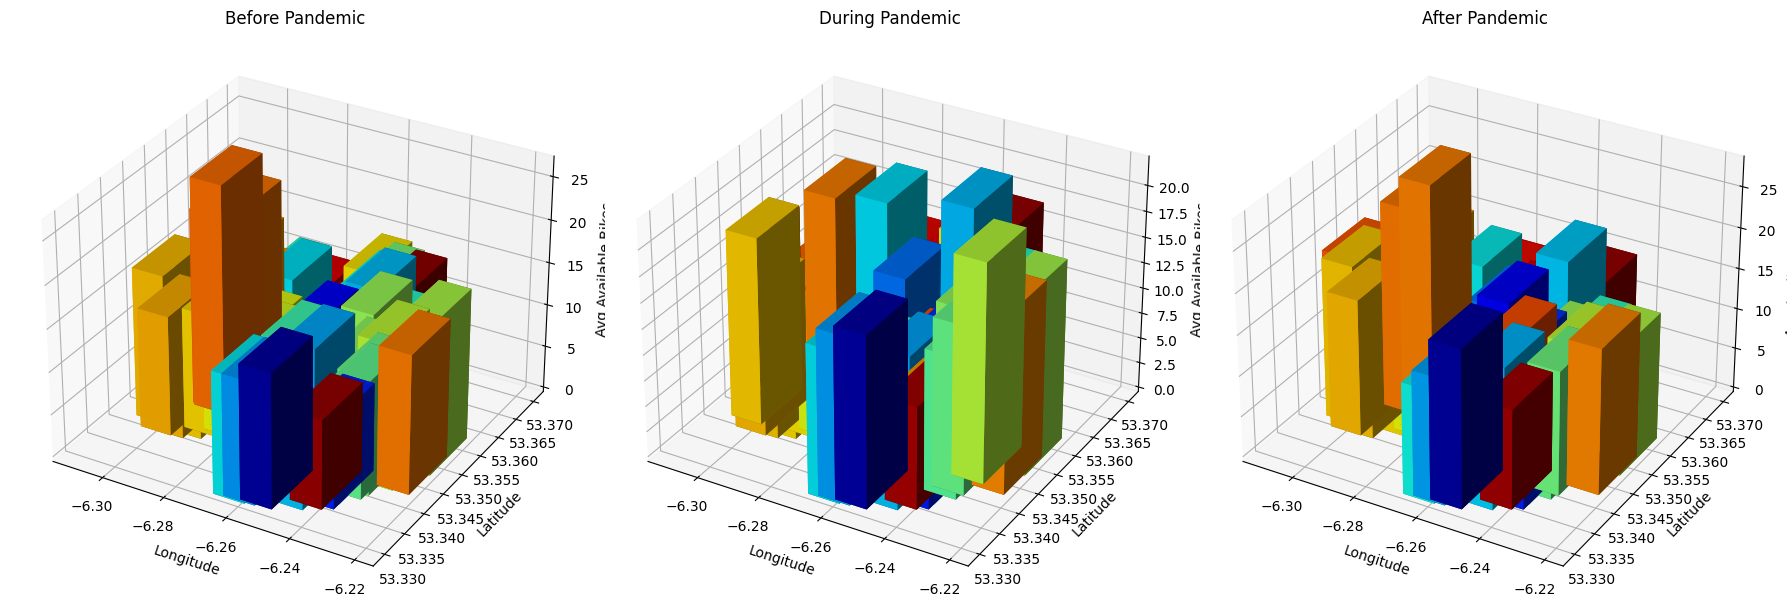

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to prepare geospatial data
def prepare_geospatial_data(data):
    # Group by station to get the mean available bikes
    station_usage = data.groupby('STATION ID').agg({
        'LATITUDE': 'first',
        'LONGITUDE': 'first',
        'AVAILABLE BIKES': 'mean'
    }).reset_index()
    return station_usage

# Prepare geospatial data
geo_data_before = prepare_geospatial_data(before_pandemic_data)
geo_data_during = prepare_geospatial_data(during_pandemic_data)
geo_data_after = prepare_geospatial_data(after_pandemic_data)

# Create 3D bar plots
fig = plt.figure(figsize=(18, 6))

# Function to plot a 3D bar plot with unique colors
def plot_3d_bars(ax, geo_data, title):
    xpos = geo_data['LONGITUDE']
    ypos = geo_data['LATITUDE']
    zpos = [0] * len(geo_data)
    dx = dy = 0.01  # Width of the bars
    dz = geo_data['AVAILABLE BIKES']
    
    colors = plt.cm.jet(np.linspace(0, 1, len(geo_data)))
    
    for i in range(len(geo_data)):
        ax.bar3d(xpos[i], ypos[i], zpos[i], dx, dy, dz[i], color=colors[i])
    
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Avg Available Bikes')

# Plot for each period
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_bars(ax1, geo_data_before, 'Before Pandemic')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_bars(ax2, geo_data_during, 'During Pandemic')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_bars(ax3, geo_data_after, 'After Pandemic')

# Show plot
plt.tight_layout()
plt.show()


3.2 base on bike usage

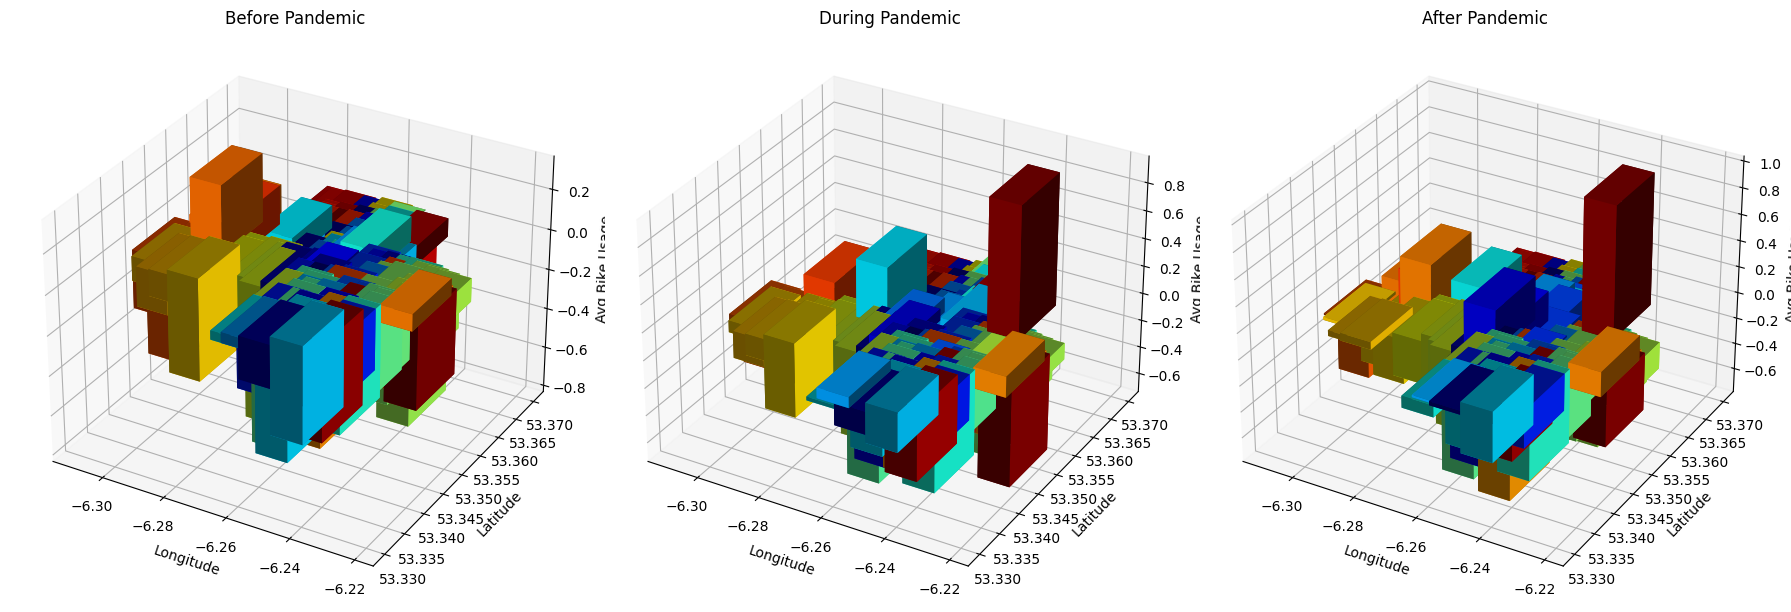

In [4]:
# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Function to prepare geospatial data
def prepare_geospatial_data(data):
    # Group by station to get the mean available bikes
    station_usage = data.groupby('STATION ID').agg({
        'LATITUDE': 'first',
        'LONGITUDE': 'first',
        'BIKE USAGE': 'mean'
    }).reset_index()
    return station_usage

# Prepare geospatial data
geo_data_before = prepare_geospatial_data(before_pandemic_data)
geo_data_during = prepare_geospatial_data(during_pandemic_data)
geo_data_after = prepare_geospatial_data(after_pandemic_data)

# Create 3D bar plots
fig = plt.figure(figsize=(18, 6))

# Function to plot a 3D bar plot with unique colors
def plot_3d_bars(ax, geo_data, title):
    xpos = geo_data['LONGITUDE']
    ypos = geo_data['LATITUDE']
    zpos = [0] * len(geo_data)
    dx = dy = 0.01  # Width of the bars
    dz = geo_data['BIKE USAGE']
    
    colors = plt.cm.jet(np.linspace(0, 1, len(geo_data)))
    
    for i in range(len(geo_data)):
        ax.bar3d(xpos[i], ypos[i], zpos[i], dx, dy, dz[i], color=colors[i])
    
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Avg Bike Usage')

# Plot for each period
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_bars(ax1, geo_data_before, 'Before Pandemic')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_bars(ax2, geo_data_during, 'During Pandemic')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_bars(ax3, geo_data_after, 'After Pandemic')

# Show plot
plt.tight_layout()
plt.show()
